<a href="https://colab.research.google.com/github/Shekhawat34/Machine-Learning-Project/blob/main/Time_Series_Analysis_of_Yahoo_Stock_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Import Yahoo Stock Dataset

In [58]:
yahoo_stock=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/yahoo_stock/yahoo_stock.csv')
yahoo_stock.head()


,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
1,2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2,2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
3,2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
4,2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107


## Check for any null value

In [59]:
yahoo_stock.isna().sum()

,0
Date,0
High,0
Low,0
Open,0
Close,0
Volume,0
Adj Close,0


In [60]:
yahoo_stock.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1825.000000,1825.000000,1825.000000,1825.000000,1.825000e+03,1825.000000
mean,2660.718673,2632.817580,2647.704751,2647.856284,3.869627e+09,2647.856284
std,409.680853,404.310068,407.169994,407.301177,1.087593e+09,407.301177
min,1847.000000,1810.099976,1833.400024,1829.079956,1.296540e+09,1829.079956
25%,2348.350098,2322.250000,2341.979980,2328.949951,3.257950e+09,2328.949951
50%,2696.250000,2667.840088,2685.489990,2683.340088,3.609740e+09,2683.340088
75%,2930.790039,2900.709961,2913.860107,2917.520020,4.142850e+09,2917.520020
max,3645.989990,3600.159912,3612.090088,3626.909912,9.044690e+09,3626.909912


## Plot the Stock Price

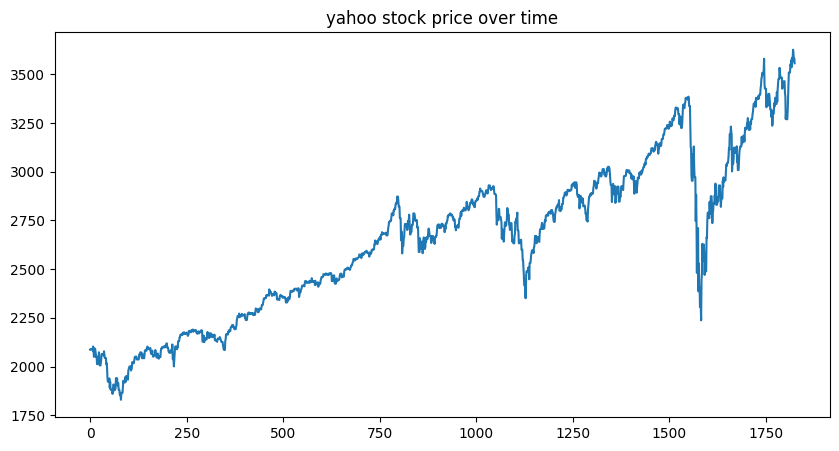

In [61]:
yahoo_stock['Close'].plot(title="yahoo stock price over time",figsize=(10,5))
plt.savefig("yahoo stock price over time")

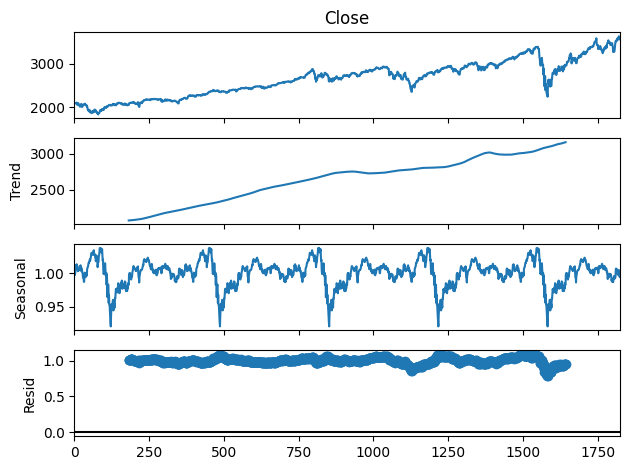

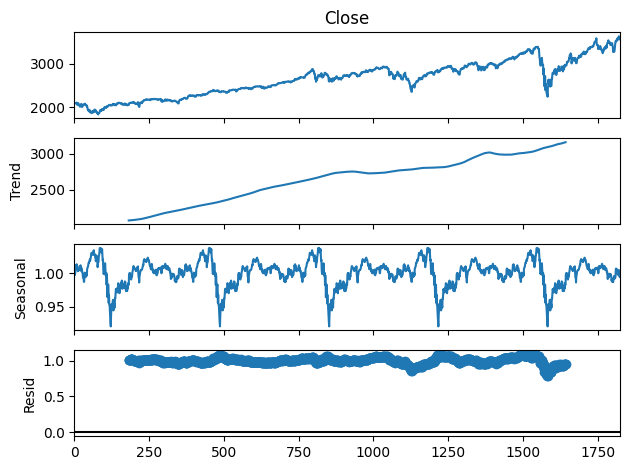

In [62]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(yahoo_stock['Close'],model='multiplicative',period=365)
decomposition.plot()


## Stationarity check

In [63]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(yahoo_stock['Close'])
print("ADF statistics",result[0])
p_value=result[1]
if p_value>0.5:
  print("series is Non-stationary and need differencing")
else:
  print("Stationary")

ADF statistics -0.8703973870161456
series is Non-stationary and need differencing


## Differencing

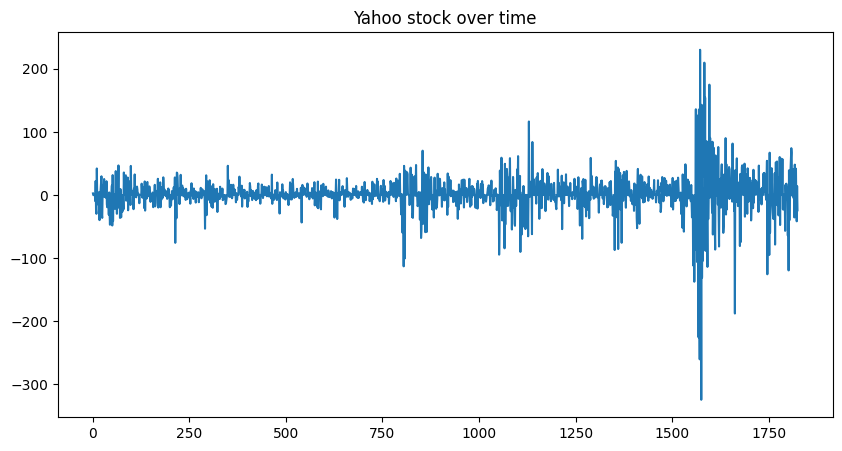

In [64]:
yahoo_stock['Close_diff']=yahoo_stock['Close'].diff().dropna()
yahoo_stock["Close_diff"].plot(title="Yahoo stock over time",figsize=(10,5))
plt.savefig("Yahoo stock over time")

## Auto correlation and partial Auto correlation

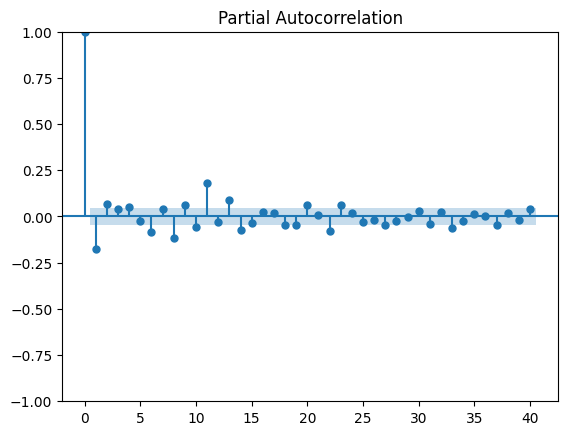

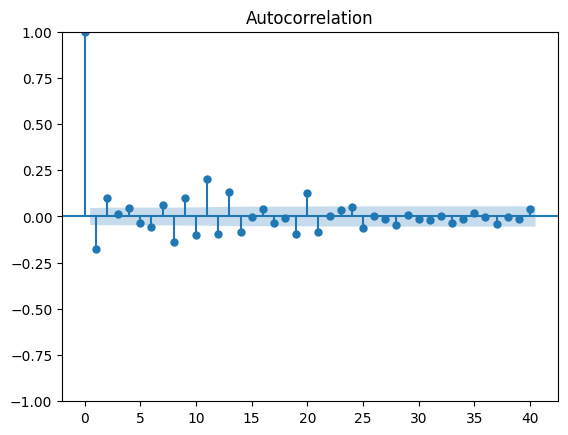

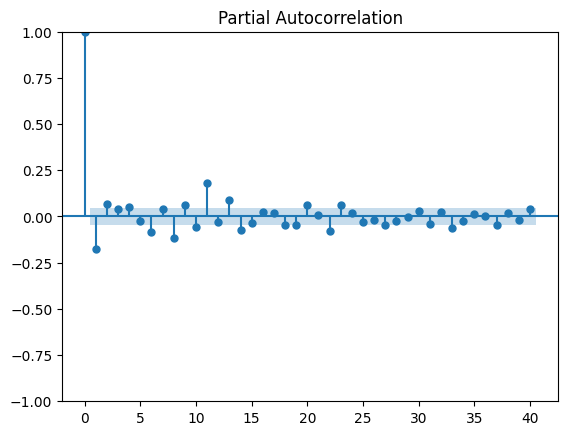

In [65]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(yahoo_stock['Close_diff'].dropna(),lags=40)
plot_pacf(yahoo_stock['Close_diff'].dropna(),lags=40)


## ARIMA Model

In [66]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(yahoo_stock['Close'],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1825
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -8595.892
Date:                Mon, 09 Sep 2024   AIC                          17197.784
Time:                        10:12:25   BIC                          17214.310
Sample:                             0   HQIC                         17203.880
                               - 1825                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4444      0.033    -13.400      0.000      -0.509      -0.379
ma.L1          0.2759      0.036      7.707      0.000       0.206       0.346
sigma2       725.8924      6.074    119.514      0.000     713.988     737.797
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):             69131.99
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               9.94   Skew:                            -1.93
Prob(H) (two-sided):                  0.00   Kurtosis:                        32.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Model Diagnostic


 

     lb_stat  lb_pvalue
10  2.771964   0.986293

 



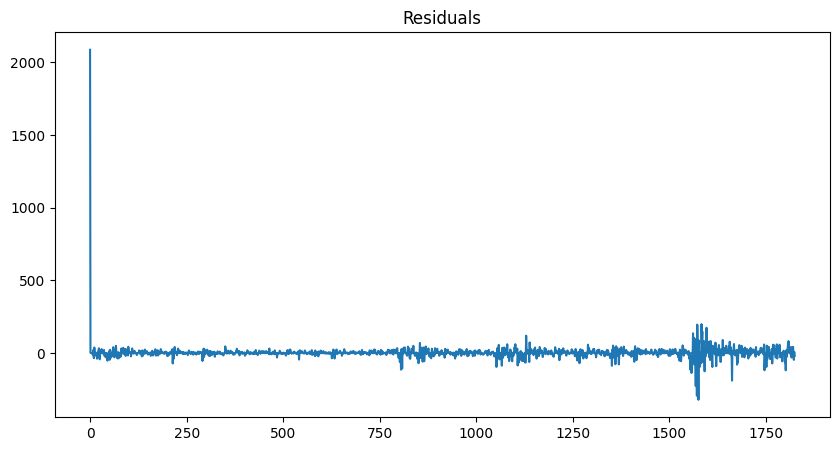

In [67]:
residual=model_fit.resid
residual.plot(title="Residuals",figsize=(10,5))
plt.savefig("Residuals")
print("\n \n")
# L-jung Box test
from statsmodels.stats.diagnostic import acorr_ljungbox
lb_test = acorr_ljungbox(residual, lags=[10], return_df=True)

print(lb_test)
print("\n \n")

## Forcasting

1825    3562.726968
1826    3560.421998
1827    3561.446282
1828    3560.991110
1829    3561.193380
1830    3561.103495
1831    3561.143438
1832    3561.125688
1833    3561.133576
1834    3561.130071
1835    3561.131628
1836    3561.130936
1837    3561.131244
1838    3561.131107
1839    3561.131168
1840    3561.131141
1841    3561.131153
1842    3561.131148
1843    3561.131150
1844    3561.131149
1845    3561.131149
1846    3561.131149
1847    3561.131149
1848    3561.131149
1849    3561.131149
1850    3561.131149
1851    3561.131149
1852    3561.131149
1853    3561.131149
1854    3561.131149
Name: predicted_mean, dtype: float64


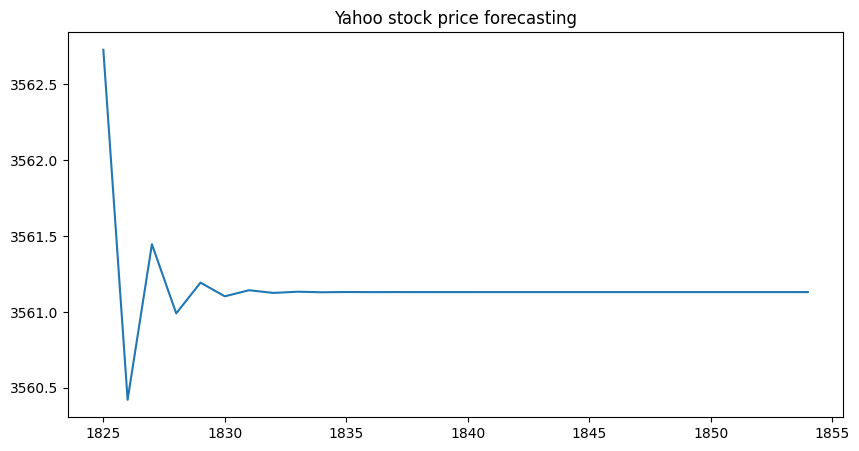

In [68]:
forecast=model_fit.forecast(steps=30)
print(forecast)

forecast.plot(title="Yahoo stock price forecasting",figsize=(10,5))
plt.savefig("Yahoo stock price forecasting")

## Model Evaluation

In [69]:
from sklearn.metrics import mean_squared_error
import numpy as np

predicted = model_fit.predict(start=len(yahoo_stock)-30, end=len(yahoo_stock)-1, typ='levels')
actual = yahoo_stock['Close'][-30:]

# RMSE
rmse = np.sqrt(mean_squared_error(actual, predicted))
print(f'RMSE: {rmse}')

RMSE: 40.230603575279076


## Backtesting and validation

1460    3103.802489
1461    3103.793917
1462    3103.794197
1463    3103.794188
1464    3103.794188
           ...     
1820    3103.794188
1821    3103.794188
1822    3103.794188
1823    3103.794188
1824    3103.794188
Name: predicted_mean, Length: 365, dtype: float64


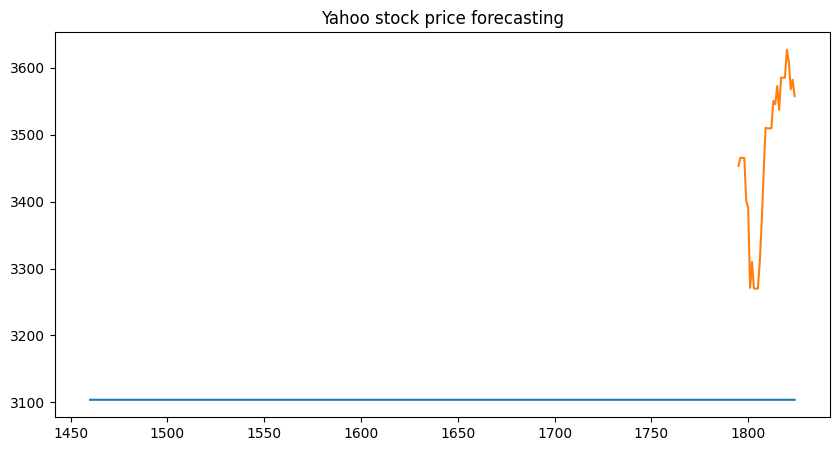

In [70]:
train = yahoo_stock['Close'][:int(0.8 * len(yahoo_stock))]
test = yahoo_stock['Close'][int(0.8 * len(yahoo_stock)):]

model = ARIMA(train, order=(1,1,1))
model_fit = model.fit()

# Predict and evaluate on test set
predictions = model_fit.forecast(steps=len(test))
print(predictions)

predictions.plot(title="Yahoo stock price forecasting",figsize=(10,5))
actual.plot(title="Yahoo stock price forecasting",figsize=(10,5))
plt.savefig("Yahoo stock price forecasting")

Since we didn't got the result as expectedn then it's time to use different model to increase precition accuracy

## Modify model accuracy

In [71]:
import yfinance as yf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,Dropout


In [72]:
yahoo_stock_LSTM=yahoo_stock
yahoo_stock_LSTM.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Close_diff
0,2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088,NaN
1,2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893,2.549805
2,2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117,-0.269775
3,2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117,0.000000
4,2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107,1.239990


In [73]:
closes_prices=yahoo_stock_LSTM['Close']

In [74]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(closes_prices.values.reshape(-1,1))

training_data_len=int(np.ceil(0.8*len(scaled_data)))

train_data=scaled_data[0:training_data_len,:]
test_data=scaled_data[training_data_len-60:,:]


## Prepare Data for LSTM

In [75]:
def create_sequence(data,sequence_length=60):
   x=[]
   y=[]
   for i in range(sequence_length,len(data)):
     x.append(data[i-sequence_length:i,0]) # previous 60 days
     y.append(data[i,0]) # target value(next day)
   return np.array(x),np.array(y)

x_train,y_train=create_sequence(train_data)
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

x_test,y_test=create_sequence(test_data)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))


## Build LSTM Model

In [76]:
model=Sequential()

model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=1))

#compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

#train the model
model.fit(x_train,y_train,batch_size=64,epochs=10)

Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 68ms/step - loss: 0.1003
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.0079
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.0035
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.0025
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.0026
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - loss: 0.0025
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - loss: 0.0022
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 0.0024
Epoch 9/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - loss: 0.0019
Epoch 10/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0020


In [77]:
predictions=model.predict(x_test)

predictions=scaler.inverse_transform(predictions)
y_test=scaler.inverse_transform(y_test.reshape(-1,1))

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step


# Evaluate the model

In [78]:
from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(y_test,predictions))
print(f"RMSE:{rmse}")

RMSE:102.62470912683915


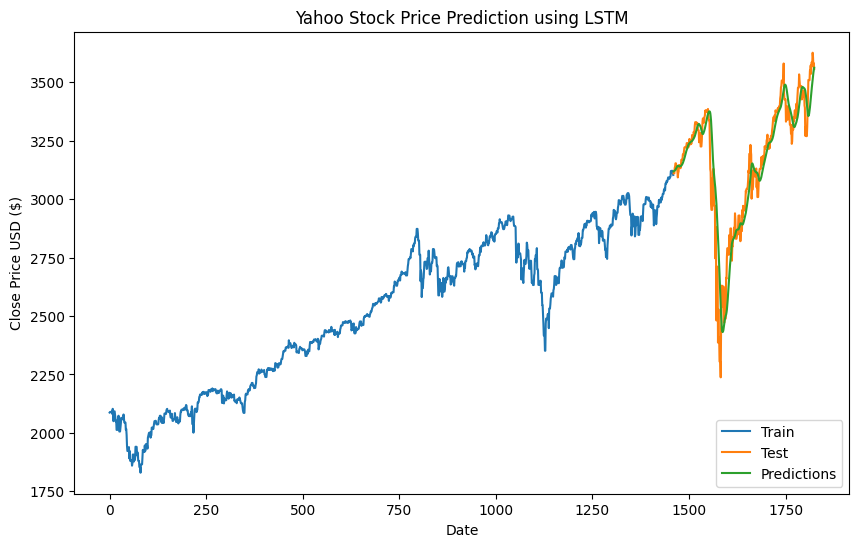

<Figure size 640x480 with 0 Axes>

In [79]:
# Plot the data
train = closes_prices[:training_data_len]
valid = closes_prices[training_data_len:]
valid = pd.DataFrame(valid) # Convert valid to a DataFrame
valid['Predictions'] = predictions

plt.figure(figsize=(10, 6))
plt.title('Yahoo Stock Price Prediction using LSTM')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train) # Plot the Series directly
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Test', 'Predictions'], loc='lower right')
plt.show()
plt.savefig("Yahoo Stock Price Prediction Using LSTM")

Great! we got the best prediction

## Forcasting Future Prices

In [80]:
# Forcast for the next 30 days

new_data=scaled_data[-60:]
new_data=np.reshape(new_data,(1,60,1))
future_prediction=model.predict(new_data)
future_prediction=scaler.inverse_transform(future_prediction)
print(f"Next day predicted close Price:{future_prediction[0][0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Next day predicted close Price:3569.06787109375
